In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# reshape data

X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train_conv = X_train.reshape([len(X_train), 28, 28, 1]).astype(np.float32)
X_test_conv = X_test.reshape([len(X_test), 28, 28, 1]).astype(np.float32)

X_train_flat = X_train.reshape([len(X_train), -1]).astype(np.float32)
X_test_flat = X_test.reshape([len(X_test), -1]).astype(np.float32)
ndim_in = X_train_flat.shape[1]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
ndim_out = y_train.shape[1]

In [ ]:
# select options

mode = 'conv'

if mode == 'conv':
    X_train = X_train_conv
    X_test = X_test_conv
    n_epochs = 4
elif mode == 'basic':
    X_train = X_train_flat
    X_test = X_test_flat
    n_epochs = 10

In [18]:
# define the network

if mode == 'conv':
    layers = [
                Conv2D(10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1), strides=(1,1)),
                MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                Dropout(.2),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(ndim_out, activation='softmax')
             ]


elif mode == 'basic':
    layers = [ 
                Dense(100, activation='sigmoid', input_shape=(ndim_in,)),
                Dense(10, activation='sigmoid'),
                Dense(ndim_out, activation='softmax')
             ]

model = Sequential()
for l in layers:
    model.add(l)

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, y_train, batch_size=500, epochs=n_epochs, validation_split=.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 18s - loss: 0.5408 - acc: 0.8549 - val_loss: 0.1685 - val_acc: 0.9538
Epoch 2/4
54000/54000 [==============================] - 17s - loss: 0.1677 - acc: 0.9507 - val_loss: 0.0984 - val_acc: 0.9752
Epoch 3/4
54000/54000 [==============================] - 18s - loss: 0.1156 - acc: 0.9660 - val_loss: 0.0768 - val_acc: 0.9787
Epoch 4/4
54000/54000 [==============================] - 19s - loss: 0.0925 - acc: 0.9718 - val_loss: 0.0655 - val_acc: 0.9818


In [8]:
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.047270670714043082, 0.98550000000000004]


In [ ]:
# Exercise: select 1 of each class in the test dataset, 
# show the original image, and title it with the prediction of our net
# hint: model.predict is useful

In [21]:
# a good shortcut for evaluating the network

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# convert back to simpler format
y_pred_ = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

print(classification_report(y_test_, y_pred_))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.98      0.99      0.99      1135
          2       0.97      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.98      0.99      0.98       982
          5       0.98      0.99      0.98       892
          6       0.99      0.97      0.98       958
          7       0.98      0.96      0.97      1028
          8       0.97      0.97      0.97       974
          9       0.97      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



In [ ]:
for lyr in model.layers:
    w = lyr.get_weights()

In [46]:
output_1 = Model(inputs=model.input, outputs=model.get_layer(index=2).output)
inspect = output_1.predict(X_test)

In [63]:
ex_idx = 2
feature_idx = 6
img_in = X_test[ex_idx,...,0]
img_out = inspect[ex_idx,:,:,feature_idx]

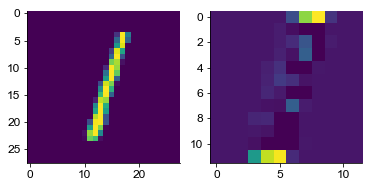

In [64]:
%matplotlib inline
fig,axs = pl.subplots(1,2)

axs[0].imshow(img_in)
axs[1].imshow(img_out)

In [48]:
X_test.shape

(10000, 28, 28, 1)